<a href="https://colab.research.google.com/github/Sunil-1234/Cross-Validation-of-UCI_CREDIT_CARD-dataset/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
print(data.describe(include=[np.float]))

            LIMIT_BAL      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count    30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    167484.322667   51223.330900   49179.075167  4.701315e+04   
std     129747.661567   73635.860576   71173.768783  6.934939e+04   
min      10000.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%      50000.000000    3558.750000    2984.750000  2.666250e+03   
50%     140000.000000   22381.500000   21200.000000  2.008850e+04   
75%     240000.000000   67091.000000   64006.250000  6.016475e+04   
max    1000000.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
# Checking if any column contains null value
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

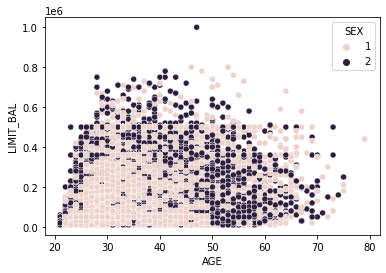

In [ ]:
sns.scatterplot(x='AGE',y='LIMIT_BAL',data=data,hue='SEX')
plt.show()

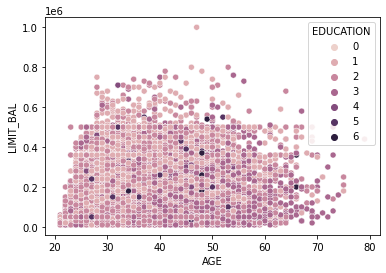

In [ ]:
sns.scatterplot(x='AGE',y='LIMIT_BAL',data=data,hue='EDUCATION')
plt.show()

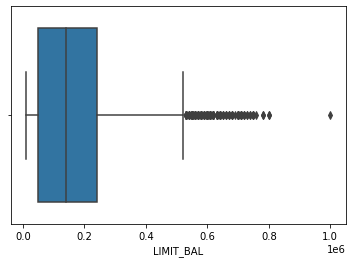

In [ ]:
sns.boxplot(x='LIMIT_BAL',data=data)

In [ ]:
# We are defining a function for calculating lower and outer outlier

from numpy import percentile
def oultier_detection(dataframe):
  q1,q2,q3=percentile(dataframe,25),percentile(dataframe,50),percentile(dataframe,75)
  iqr=q3-q1
  limit=1.5*iqr
  lower_outlier=q1-limit
  upper_outlier=q3+limit
  return lower_outlier,upper_outlier

In [ ]:
# Getting value of outlier from the function we defined
lower,upper=oultier_detection(data['LIMIT_BAL'])
print(lower)
print(upper)

-235000.0
525000.0


In [ ]:
Upper_outliers =data.loc[data['LIMIT_BAL'] > upper]
Lower_outliers =data.loc[data['LIMIT_BAL'] < lower]
print(" Number of rows present above upper cutoff : ", Upper_outliers.shape)
print(" Number of rows present above upper cutoff : ",Lower_outliers.shape)

 Number of rows present above upper cutoff :  (167, 25)
 Number of rows present above upper cutoff :  (0, 25)


In [ ]:
# percentage of missing values in each column
round(data.isnull().sum()/len(data.index), 2)*100

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

In [ ]:
#  Elements of list x will be used for predicting y
x=data[['AGE','LIMIT_BAL','EDUCATION','SEX']]
y=data[['default.payment.next.month']]

**Logistic Regression Model**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [ ]:
# Splliting data into train and testing set 
#80 % of data is used for training and rest 20 % for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

In [ ]:
# Fiitting the value of x-train and y-train into logistic regression
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predict the o/p using predict method of Logistic Regression
data_predict=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# checking accuracy score for data predicted

print("accuracy is",accuracy_score(data_predict,y_test))

accuracy is 0.7833333333333333


**Random Forest Method
**

In [ ]:
# importing library for random forest classifier
from sklearn.ensemble import RandomForestClassifier as  RFC 
rfc=RFC()

In [ ]:
# Fitting value of training set into this method
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [ ]:
# Predicting the value of x_test data
y_predict=rfc.predict(x_test)

In [59]:
# Now, compare the value our model predict (y_predict) and actual value(y_test)
print("accuracy is:",accuracy_score(y_test,y_predict))

accuracy is: 0.7426666666666667


**We see that accuracy score of logistic regression is more than the random forest classifier model therefore logostic regression model fit well for given dataset**